# Title : Implementation of regression techniques on time-series data to generate future predictions.

- A Cloud platform continuously records the resource utilization of instances per minute and stores this information in the resource utilization log. For example, Instance A, has its CPU, Memory, Disk and Network Bandwidth utilization with a timestamp stored in a log file. This log file then contains the historical data of resource utilization from the time that Instance A was created and till the time it was destroyed.

### Problem statement:
- How can we use Machine Learning constructs, to implement an intelligent system, that allow the user to see a predicted forecast of resources. Input to the system is resource log files. The system is expected to perform required data cleaning and transformation. Then the system is expected to perform required analysis on the processed data and generate results in terms of future predictions. The output of the system should be a predicted resources log.

### Functional Requirements:
1. System should convert given data into required data model. This stage generates 'input-data.
2. System should implement relevant and required data cleaning and data
transformations techniques in the input data. This stage generates
'pre-processed-data'.
3. System should (if required) perform training on pre-processed-data and
generate machine learning model. This stage will generate a 'model'.
4. System should process pre-processed-data and generate prediction
results. This stage generates 'predicted-transactions'.

### Expected Results:
Given the data-set below, following are the expected results from the system,
1. Predictions per Instance (required)
2. Predictions per Group (required)
3. Predictions per Resource (CPU/Memory/Network/Storage) per group or per
instance (optional)

### Expected Deliverables:
1. Link to the code base as a GitHub/GitLab repo. (required)
2. Assignment documentation which should include the following, (required)
    
    a. Problem Statement

    b. Brief description (your understanding about the problem and its
    brief explanation)

    c. Proposed solution (this section must include your solution to
    the problem, relevant algorithm, techniques, frameworks used)

    d. Block diagram (a diagram explaining, data flow, processing and
    overall architecture of your solution)

    e. Sample Test Results

    f. Future scope (possible improvements, performance tweaks, ability
    to process other time-series data etc)
    
3. Document containing references, bibliography items. (optional)




In [ ]:
!wget --header="Host: nsk-ecos.enlightcloud.com:8080" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.101 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" "http://nsk-ecos.enlightcloud.com:8080/v1/AUTH_e4fa818cb8d34f06bb6274ac8d5b30f9/assignment-files/group82_resource_utilization.zip" -c -O 'group82_resource_utilization.zip'

--2020-12-24 09:04:34--  http://nsk-ecos.enlightcloud.com:8080/v1/AUTH_e4fa818cb8d34f06bb6274ac8d5b30f9/assignment-files/group82_resource_utilization.zip
Resolving nsk-ecos.enlightcloud.com (nsk-ecos.enlightcloud.com)... 115.124.98.240
Connecting to nsk-ecos.enlightcloud.com (nsk-ecos.enlightcloud.com)|115.124.98.240|:8080... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215449235 (205M) [application/zip]
Saving to: ‘group82_resource_utilization.zip’

group82_resource_ut 100%[===================>] 205.47M  3.46MB/s    in 56s     

2020-12-24 09:05:31 (3.70 MB/s) - ‘group82_resource_utilization.zip’ saved [215449235/215449235]



In [ ]:
!mkdir /content/group82_resource_utilization
!unzip /content/group82_resource_utilization.zip -d /content/group82_resource_utilization

In [ ]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import os
import warnings
warnings.filterwarnings('ignore')

# 1. Exploratory data analysis (EDA) - Understanding the data

In [ ]:
# 1. Total no. of unique folders i.e., instances
dir_lst = os.listdir('/content/group82_resource_utilization')
print('Total no. of unique folders i.e., instances : ', len(dir_lst))

Total no. of unique folders i.e., instances :  3570


In [ ]:
# 2. Total no. of unique groups
dir_lst = os.listdir('group82_resource_utilization')
grp_lst = []
for i in dir_lst:
    x = i.split('_')
    y = '_'.join([x[0], x[1]])
    grp_lst.append([y, x[2]])
# pd.DataFrame(grp_lst, columns = ['group', 'instance'])
grp_lst = np.array(grp_lst)
print('Total no. of unique GROUPS : ', len(np.unique(grp_lst[:, 0])))

Total no. of unique GROUPS :  82


In [ ]:
# 3. How many datapoints each instance has?
cnt_per_instance_lst = []
for i in tqdm(dir_lst):
    folder = 'group82_resource_utilization/'+i
    if os.listdir(folder):
        f = open(folder + '/' + os.listdir(folder)[0], 'r')
        cnt = 0
        for dp in f:
            if len(dp)>0 and not re.findall('\x00', dp):
                cnt+=1
        cnt_per_instance_lst.append(cnt)
        f.close()

100%|██████████| 3570/3570 [00:34<00:00, 104.77it/s]


In [ ]:
len(cnt_per_instance_lst)

3570

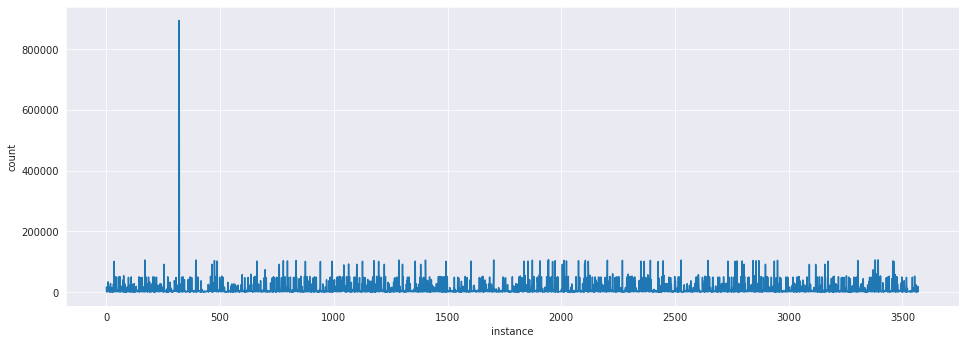

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (16, 5.5))
plt.plot(cnt_per_instance_lst)
plt.xlabel('instance')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


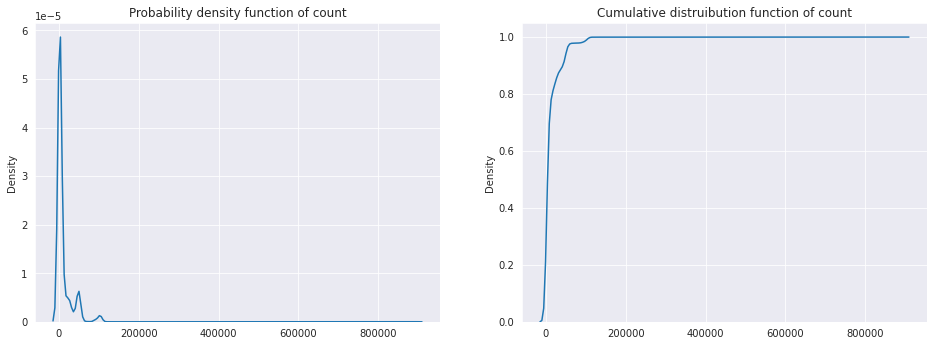

In [ ]:
# PDF
plt.figure(figsize = (16, 5.5))
plt.subplot(1,2,1)
plt.title('Probability density function of count')
sns.distplot(cnt_per_instance_lst, hist=False)

# CDF
plt.subplot(1,2,2)
plt.title('Cumulative distruibution function of count')
sns.distplot(cnt_per_instance_lst, hist=False, kde_kws= {'cumulative': True})

plt.show()

In [ ]:
# understanding extreme counts using percentile method
for i in np.arange(90, 100.5, 0.5):
    print('percentile:', i, '| count:', int(np.percentile(cnt_per_instance_lst, i)))

percentile: 90.0 | count: 46728
percentile: 90.5 | count: 47065
percentile: 91.0 | count: 48085
percentile: 91.5 | count: 48836
percentile: 92.0 | count: 49081
percentile: 92.5 | count: 49262
percentile: 93.0 | count: 49497
percentile: 93.5 | count: 49795
percentile: 94.0 | count: 49942
percentile: 94.5 | count: 50179
percentile: 95.0 | count: 50353
percentile: 95.5 | count: 50543
percentile: 96.0 | count: 50936
percentile: 96.5 | count: 51493
percentile: 97.0 | count: 52232
percentile: 97.5 | count: 54364
percentile: 98.0 | count: 91545
percentile: 98.5 | count: 101488
percentile: 99.0 | count: 102456
percentile: 99.5 | count: 104337
percentile: 100.0 | count: 894794


In [ ]:
# understanding extreme counts using percentile method
for i in np.arange(0, 42, 2):
    print('percentile:', i, '| count:', int(np.percentile(cnt_per_instance_lst, i)))

percentile: 0 | count: 1
percentile: 2 | count: 76
percentile: 4 | count: 434
percentile: 6 | count: 724
percentile: 8 | count: 1169
percentile: 10 | count: 1633
percentile: 12 | count: 1913
percentile: 14 | count: 1942
percentile: 16 | count: 1955
percentile: 18 | count: 1975
percentile: 20 | count: 1998
percentile: 22 | count: 2045
percentile: 24 | count: 2046
percentile: 26 | count: 2051
percentile: 28 | count: 2052
percentile: 30 | count: 2054
percentile: 32 | count: 2055
percentile: 34 | count: 2056
percentile: 36 | count: 2058
percentile: 38 | count: 2100
percentile: 40 | count: 2149


# Observations:
    1. Almost 97.5% instances has less than 55000 datapoints in it
    2. 40% instances has less than 2200 data points in it
    
# Conclusion:
    1. Some instances do not have enough datapoints, hence few instance based models may perform poorly.

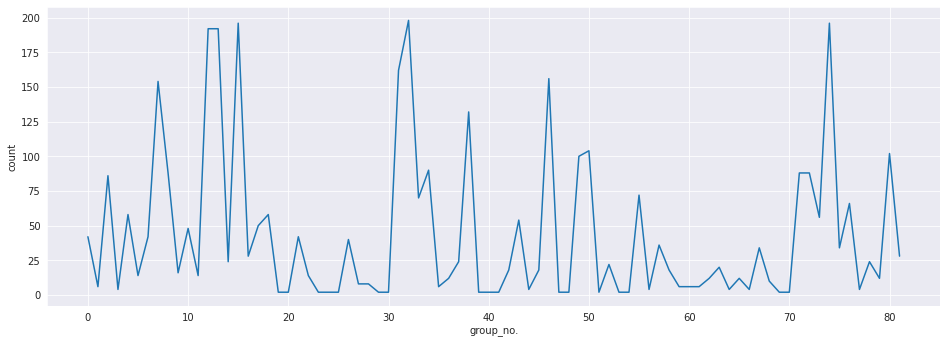

In [ ]:
# 4. How many instances each group has?
val, cnt = np.unique(grp_lst[:, 0], return_counts=True)
sns.set_style('darkgrid')
plt.figure(figsize = (16, 5.5))
plt.plot(cnt)
plt.xlabel('group_no.')
plt.ylabel('count')
plt.show()

In [ ]:
print(sorted(cnt))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 8, 8, 10, 12, 12, 12, 12, 14, 14, 14, 16, 18, 18, 18, 20, 22, 24, 24, 24, 28, 28, 34, 34, 36, 40, 42, 42, 42, 48, 50, 54, 56, 58, 58, 66, 70, 72, 86, 88, 88, 88, 90, 100, 102, 104, 132, 154, 156, 162, 192, 192, 196, 196, 198]


# Observations:
    1. each group has atleast 2 instances in it.
    2. few groups has more than 190 instance in it

# Conclusion
    1. Primary conclusion is ML models may work better on groups than single instance based models 
    2. But we need to take care of data variability i.e., group has data from multiple instances, each instance may have different range of values in it. This can cause a problem to ML model.

In [ ]:
# 5. How many datapoints each group has?

# creating path list for each group
path_lst = []
for grp in val:
    grp_arr = grp_lst[np.where(grp_lst[:,0] == grp)]
    path_arr = grp_arr[:, 0].astype(object) + '_' + grp_arr[:, 1].astype(object)
    path_lst.append(path_arr)

# counting datapoints for each group
cnt_per_grp_lst = []
for h in tqdm(path_lst):
    cnt = 0
    for i in h:
        folder = 'group82_resource_utilization/'+i
        if os.listdir(folder):
            f = open(folder + '/' + os.listdir(folder)[0], 'r')
            for i in f:
                if len(dp)>0 and not re.findall('\x00', dp):
                    cnt+=1
            f.close()
    cnt_per_grp_lst.append(cnt)

100%|██████████| 82/82 [00:33<00:00,  2.44it/s]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


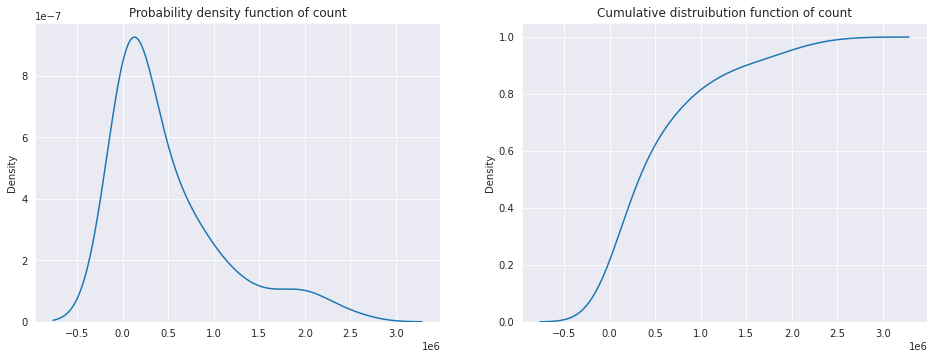

In [ ]:
plt.figure(figsize = (16, 5.5))
plt.subplot(1,2,1)
plt.title('Probability density function of count')
sns.distplot(cnt_per_grp_lst, hist=False)

plt.subplot(1,2,2)
plt.title('Cumulative distruibution function of count')
sns.distplot(cnt_per_grp_lst, hist=False, kde_kws= {'cumulative': True})

plt.show()

In [ ]:
print(sorted(cnt_per_grp_lst))

[96, 2086, 3276, 3521, 4137, 4201, 4215, 5926, 6230, 6489, 6603, 7869, 8157, 14983, 15578, 22620, 28594, 29048, 38455, 49561, 54133, 54566, 54629, 62237, 68216, 78071, 108520, 109369, 110414, 111605, 112186, 122256, 123722, 128401, 140572, 143763, 147070, 175531, 179100, 203911, 216458, 237746, 243160, 248659, 256606, 273597, 355399, 370438, 385390, 399156, 425664, 464338, 539647, 543858, 549484, 562079, 581659, 612181, 640842, 641313, 731868, 737822, 784832, 803943, 872184, 872985, 916758, 934800, 1074255, 1081396, 1161086, 1248156, 1263131, 1472984, 1503879, 1744741, 1792696, 1920159, 2012449, 2155376, 2166176, 2522333]


# Observations:
    1. Almost 13 groups has less than 10k datapoints in it.
    2. Almost 14 roups has more than 10 lakh datapoints in it.
    
# Conclusion:
    1. We may have to remove groups with very small no. of data points in it.

# 2. TASK-I : predictions per instance
### 2.1. Pre-processing and data cleaning -

In [ ]:
# 1. create dataframe for each instance
def create_df_instance(i):
    """
    in this function 'i' takes folder name as a string, which contain mem.log file
    and return pandas dataframe as output
    """
    splt = i.split('_')
    grp = splt[0] + '-' + splt[1]
    instance = splt[2]
    folder = 'group82_resource_utilization/'+i
    f = open(folder + '/' + os.listdir(folder)[0], 'r')
    
    data_lst = []
    for dp in f:                            # dp : datapoint
        if len(dp)>0 and not re.findall('\x00', dp):
            dp_splt = dp.split('"')
            timestamp = [dp_splt[1]]
            features = dp_splt[3].split(':')[:-1]
            storage_space = re.findall('[0-9]*\.?[0-9]+',dp_splt[3].split(':')[-1])    # 
            final_datapt = ([grp] + [instance] + timestamp + features + storage_space )
            data_lst.append(final_datapt)
    f.close()
    instance_df = pd.DataFrame(data_lst, columns = ['group', 'instance', 'timestamp', 'Memory_Allocated', 'Memory_Used', 'CPU_Allocated', 'CPU_Used', 'Network_bandwidth_utilization', 'Storage_space_utilization'])
    instance_df = instance_df.astype({'Memory_Allocated':int, 'Memory_Used':int,'CPU_Allocated': int, 'Memory_Used':int,
                                      'CPU_Allocated':int, 'CPU_Used':float, 'Network_bandwidth_utilization': float, 'Storage_space_utilization': float})
    
    return instance_df

In [ ]:
# 2. random test - generate random idx to test above function
idx = np.random.randint(0, len(dir_lst)) #1251
print(idx)
instance_df = create_df_instance(dir_lst[idx])
instance_df.head(3)

3307


,group,instance,timestamp,Memory_Allocated,Memory_Used,CPU_Allocated,CPU_Used,Network_bandwidth_utilization,Storage_space_utilization
0,group-1,e8dc56b5-d902-4b5f-a8d8-fd3f0c1a62a4,Sat Jan 04 21:31:04 IST 2020,0,0,0,0.0,0.0,4096.0
1,group-1,e8dc56b5-d902-4b5f-a8d8-fd3f0c1a62a4,Sat Jan 04 21:37:25 IST 2020,0,0,0,0.0,0.0,4096.0
2,group-1,e8dc56b5-d902-4b5f-a8d8-fd3f0c1a62a4,Sat Jan 04 21:43:45 IST 2020,0,0,0,0.0,0.0,4096.0


### 2.2. EDA after data cleaning :

In [ ]:
# 3. Basic info about instance_df
instance_df = create_df_instance(dir_lst[cnt_per_instance_lst.index(49468)])  # let's take any one instance with good no. of datapointss
instance_df.describe()

,Memory_Allocated,Memory_Used,CPU_Allocated,CPU_Used,Network_bandwidth_utilization,Storage_space_utilization
count,49468.000000,49468.000000,49468.0,49468.000000,49468.0,49468.0
mean,4811.814668,3868.292128,4.0,0.191130,0.0,150.0
std,4473.460860,320.254088,0.0,0.050532,0.0,0.0
min,4096.000000,1291.000000,4.0,0.000000,0.0,150.0
25%,4096.000000,3931.000000,4.0,0.170000,0.0,150.0
50%,4096.000000,3967.000000,4.0,0.190000,0.0,150.0
75%,4096.000000,3979.000000,4.0,0.210000,0.0,150.0
max,32768.000000,3979.000000,4.0,1.450000,0.0,150.0


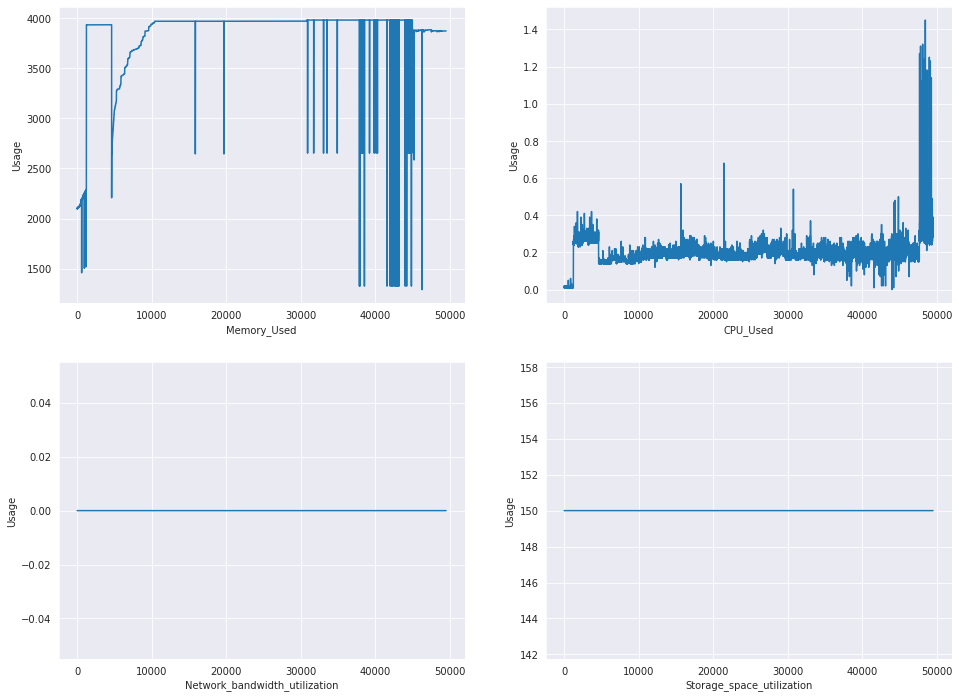

In [ ]:
# 4. plotting target numerical features
target = instance_df.columns[[4, 6, 7, 8]]
plt.figure(figsize = (16, 12))
for col in range(len(target)):
    plt.subplot(2, 2, col+1)
    plt.plot(instance_df[target[col]])
    plt.xlabel(target[col])
    plt.ylabel('Usage')
plt.show()

# Observations:
    1. For most of the instances 'Network_bandwith_utilization' and 'Storage_space_utilization' are constants
    
# Conclusion:
    1. For regression tasks, we need to have variance in target_feature. Hence, for this exercise I'll consider 'Memory_Used' and 'CPU_Used' as target feature.
    2. Let's neglect 'Network_bandwith_utilization' and 'Storage_space_utilization' target features.

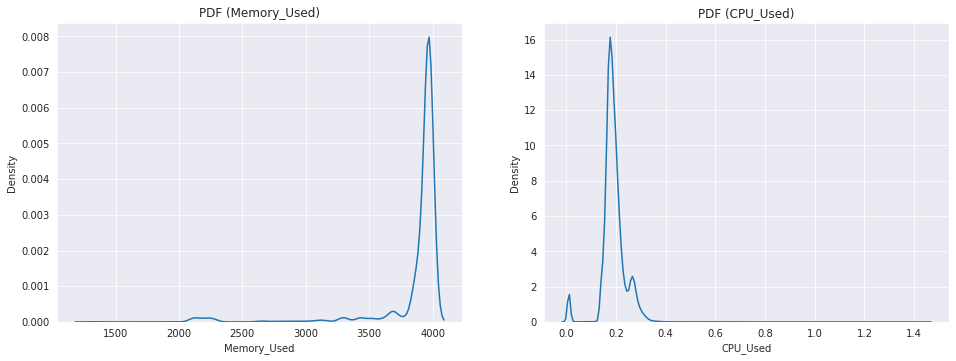

In [ ]:
# 5. Understand target feature from pdfs
plt.figure(figsize = (16, 5.5))
plt.subplot(1,2,1)
plt.title('PDF (Memory_Used)')
sns.distplot(instance_df['Memory_Used'], hist=False)

plt.subplot(1,2,2)
plt.title('PDF (CPU_Used)')
sns.distplot(instance_df['CPU_Used'], hist=False)

plt.show()

# 3. Feature transformations - Transforming data into model ready format

### 3.1. Instance based model

In [ ]:
# 1. making data model ready : basic featurization : lag features
window = 15
lstm_x = []
dense_x = instance_df[['Memory_Allocated', 'CPU_Allocated']].values[window:]
y = []
data = instance_df[['Memory_Used', 'CPU_Used']].values
for i in range(len(data) - window):
    if i+window+1 <= len(data):
        lstm_x.append(data[i:i+window])
        y.append(data[i+window])
lstm_x = np.array(lstm_x)
y = np.array(y)
lstm_x.shape, dense_x.shape, y.shape

((49453, 15, 2), (49453, 2), (49453, 2))

In [ ]:
# 2. Train test split : time based spliting
train_set = 0.70
lstm_x_train = lstm_x[:int(len(lstm_x) * train_set)]
dense_x_train = dense_x[:int(len(dense_x) * train_set)]
y_train = y[:int(len(dense_x) * train_set)]

lstm_x_cv = lstm_x[int(len(lstm_x) * train_set):]
dense_x_cv = dense_x[int(len(lstm_x) * train_set):]
y_cv = y[int(len(lstm_x) * train_set):]

lstm_x_train.shape, dense_x_train.shape, y_train.shape, lstm_x_cv.shape, dense_x_cv.shape, y_cv.shape

((34617, 15, 2),
 (34617, 2),
 (34617, 2),
 (14836, 15, 2),
 (14836, 2),
 (14836, 2))

# 4. Modelling - Deep learning based model - LSTM

In [ ]:
# 1. import essential libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, RepeatVector, TimeDistributed, Concatenate, Bidirectional
from tensorflow.keras import Model

In [ ]:
# 2. building a model
tf.keras.backend.clear_session()

dense_ins = Input(name = 'constants', shape = (2,))

lstm_ins = Input(name = 'Sequence', shape = (lstm_x.shape[1:]))
lstm_out = LSTM(name = 'LSTM', units = 128, kernel_initializer = 'glorot_normal')(lstm_ins)

concat = Concatenate(axis = -1)([dense_ins, lstm_out])

dense_1 = Dense(units = 30, activation = 'relu')(concat)
out = Dense(units = 2)(dense_1)
model = Model(inputs = [dense_ins, lstm_ins], outputs = out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence (InputLayer)           [(None, 15, 2)]      0                                            
__________________________________________________________________________________________________
constants (InputLayer)          [(None, 2)]          0                                            
__________________________________________________________________________________________________
LSTM (LSTM)                     (None, 128)          67072       Sequence[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 130)          0           constants[0][0]                  
                                                                 LSTM[0][0]                   

In [ ]:
# 3. tensorflow-keras callbacks
# 3.1 To save best models
!rm -r models
if not os.path.isdir('/content/models'):
  os.mkdir('/content/models')
save_model = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/models/weights-{epoch:02d}-{val_root_mean_squared_error:.2f}.hdf5',
                                                monitor='val_root_mean_squared_error', verbose=1,
                                                save_best_only=True, save_weights_only=True)

# 3.2 Reduce learning rate if model is not learning
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_root_mean_squared_error', factor = np.sqrt(0.1), patience = 4, verbose = 1, min_lr = 10**-6)

In [ ]:
# 4. training and evaluating model on cross validation
rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = [rmse])
hist = model.fit([dense_x_train, lstm_x_train], y_train, batch_size = 128, epochs = 40,
                 validation_data = ([dense_x_cv, lstm_x_cv], y_cv),
                 callbacks = [save_model, reduce_lr]) 

Epoch 1/40
271/271 [==============================] - 3s 6ms/step - loss: 4737778.6250 - root_mean_squared_error: 2175.8926 - val_loss: 3216818.0000 - val_root_mean_squared_error: 1793.5490

Epoch 00001: val_root_mean_squared_error improved from inf to 1793.54895, saving model to /content/models/weights-01-1793.55.hdf5
Epoch 2/40
271/271 [==============================] - 1s 5ms/step - loss: 4422735.6057 - root_mean_squared_error: 2102.9951 - val_loss: 3293271.0000 - val_root_mean_squared_error: 1814.7371

Epoch 00002: val_root_mean_squared_error did not improve from 1793.54895
Epoch 3/40
271/271 [==============================] - 1s 5ms/step - loss: 4354917.5340 - root_mean_squared_error: 2086.8079 - val_loss: 2986780.2500 - val_root_mean_squared_error: 1728.2305

Epoch 00003: val_root_mean_squared_error improved from 1793.54895 to 1728.23047, saving model to /content/models/weights-03-1728.23.hdf5
Epoch 4/40
271/271 [==============================] - 2s 6ms/step - loss: 4230296.5993 

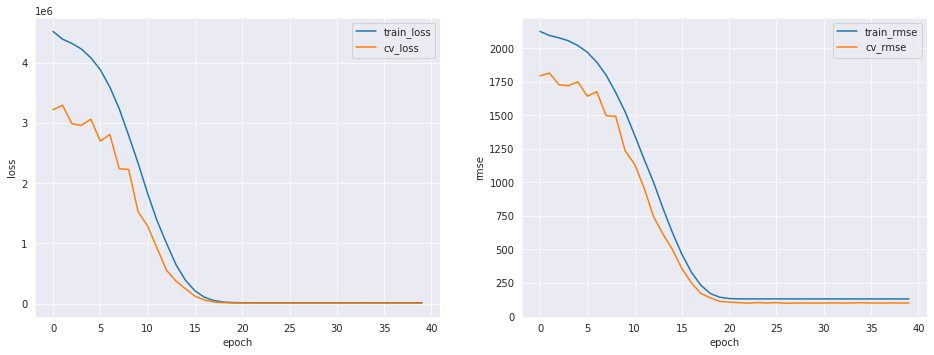

In [ ]:
# 5. Analysing model's performance using train-cv (loss and rmse) plots
plt.figure(figsize = (16, 5.5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label = 'cv_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['root_mean_squared_error'], label = 'train_rmse')
plt.plot(hist.history['val_root_mean_squared_error'], label = 'cv_rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend()
plt.show()

In [ ]:
# 6. find best model - based on (metric we care about) best val_rmse 
print('epoch :', np.argmin(hist.history['val_root_mean_squared_error']), ' | ',\
      'val_rmse :', hist.history['val_root_mean_squared_error'][np.argmin(hist.history['val_root_mean_squared_error'])])

epoch : 22  |  val_rmse : 99.21261596679688


In [ ]:
# 7. load best model
model.load_weights('/content/models/weights-23-99.21.hdf5')

In [ ]:
# 8. Predictions
idx = 145
x_test = [dense_x_cv[idx].reshape(1, -1), lstm_x_cv[idx].reshape(1, 15, 2)]
y_pred = model.predict(x_test)
y_true = y_cv[idx] 

print('y_pred :', y_pred, ' | y_true :', y_true)

y_pred : [[3.9101667e+03 3.8252997e-01]]  | y_true : [3.979e+03 2.200e-01]


In [ ]:
tensorflow.keras.utils.plot_model(model, show_shapes = True)

# 5. Error Analysis (Future improvements)

### Observations:
    1. 'Memory_Used' target feature has real (integer) values greater than 512 i.e., very large values 
    2. 'CPU_Used' target feature has real (float) values ranging between 0 to some small values (e.g. 20) i.e., it has very small float values as compare to 'Memory_used' feature

### Conclusion:
    1. Better we train 2 different models for 2 different target features.
    2. Because difference between both target feature is very huge, we are not able to make clear sense that on which feature, model is performing well.
    3. We need to employ baseline model for better comparison i.e., Train simple ML models like linear regression and some complex models like Random forest, GBDT etc. to compare performance of models with Deep learning models.
    4. We need to experiment with more time series featurization techiques e.g. 
        i. Fourrier transform
        ii. Simple moving average
        iii. Exponential weighted moving avg


# 6. TASK - II : Predictions per group
### 6.1. Pre-processing and data cleaning -

In [ ]:
# 1. making group data model ready : basic featurization : lag features
grp_lstm_x_train = []
grp_dense_x_train = []
grp_y_train = []
grp_lstm_x_cv = []
grp_dense_x_cv = []
grp_y_cv = []
for i in path_lst[0]:
    instance_df = create_df_instance(i)
    window = 15
    lstm_x = []
    dense_x = instance_df[['instance', 'Memory_Allocated', 'CPU_Allocated']].values[window:]
    y = []
    data = instance_df[['Memory_Used', 'CPU_Used']].values
    for i in range(len(data) - window):
        if i+window+1 <= len(data):
            lstm_x.append(data[i:i+window])
            y.append(data[i+window])
    lstm_x = np.array(lstm_x)
    y = np.array(y)

# 2. Train test split : time based spliting
    train_set = 0.70
    lstm_x_train = lstm_x[:int(len(lstm_x) * train_set)]
    dense_x_train = dense_x[:int(len(dense_x) * train_set)]
    y_train = y[:int(len(dense_x) * train_set)]

    lstm_x_cv = lstm_x[int(len(lstm_x) * train_set):]
    dense_x_cv = dense_x[int(len(lstm_x) * train_set):]
    y_cv = y[int(len(lstm_x) * train_set):]

    # collecting data in one list
    grp_lstm_x_train.append(lstm_x_train)
    grp_dense_x_train.append(dense_x_train)
    grp_y_train.append(y_train)
    grp_lstm_x_cv.append(lstm_x_cv)
    grp_dense_x_cv.append(dense_x_cv)
    grp_y_cv.append(y_cv)

In [ ]:
# 3. Creating final group data
grp_lstm_x_train = np.concatenate(grp_lstm_x_train, axis = 0)
grp_dense_x_train = np.concatenate(grp_dense_x_train, axis = 0)
grp_y_train = np.concatenate(grp_y_train, axis = 0)
grp_lstm_x_cv = np.concatenate(grp_lstm_x_cv, axis = 0)
grp_dense_x_cv = np.concatenate(grp_dense_x_cv, axis = 0)
grp_y_cv = np.concatenate(grp_y_cv, axis = 0)
grp_lstm_x_train.shape, grp_dense_x_train.shape, grp_y_train.shape, grp_lstm_x_cv.shape, grp_dense_x_cv.shape, grp_y_cv.shape, 

((448130, 15, 2),
 (448130, 3),
 (448130, 2),
 (192082, 15, 2),
 (192082, 3),
 (192082, 2))

### 6.2. - EDA After data cleaning

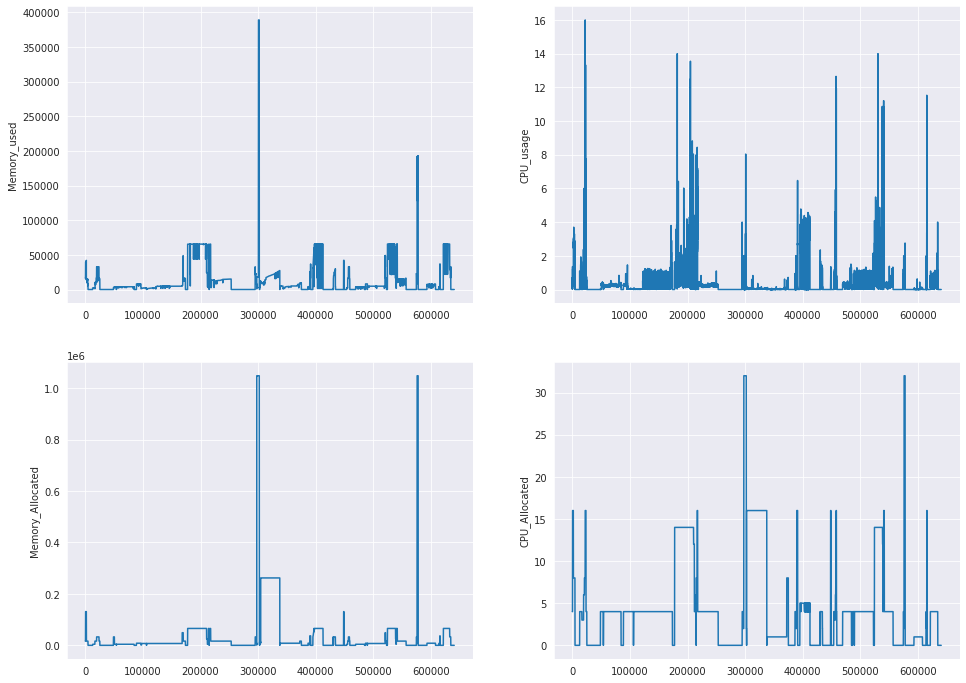

In [ ]:
# 1. plotting
plt.figure(figsize = (16, 12))
plt.subplot(2, 2 , 1)
plt.plot(np.concatenate((grp_y_train[:, 0], grp_y_cv[:, 0])))
plt.ylabel('Memory_used')

plt.subplot(2, 2 , 2)
plt.plot(np.concatenate((grp_y_train[:, 1], grp_y_cv[:, 1])))
plt.ylabel('CPU_usage')

plt.subplot(2, 2 , 3)
plt.plot(np.concatenate((grp_dense_x_train[:, 1], grp_dense_x_cv[:, 1])))
plt.ylabel('Memory_Allocated')

plt.subplot(2, 2 , 4)
plt.plot(np.concatenate((grp_dense_x_train[:, 2], grp_dense_x_cv[:, 2])))
plt.ylabel('CPU_Allocated')
plt.show()


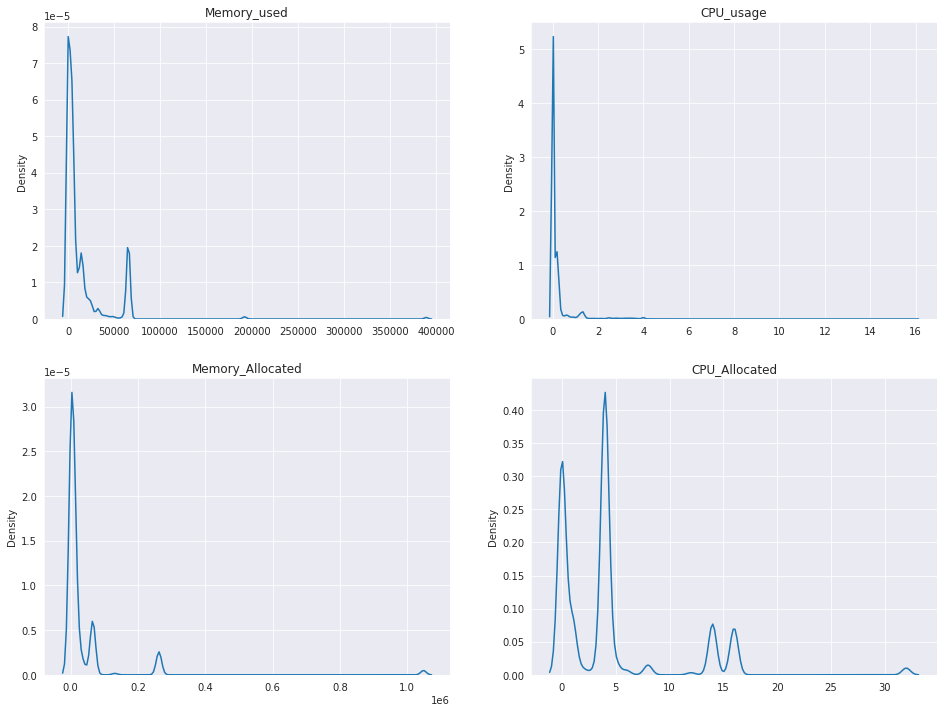

In [ ]:
# 2. Understancding outliers in 'Memory_used' with PDF
plt.figure(figsize = (16, 12))
plt.subplot(2, 2 , 1)
sns.distplot(np.concatenate((grp_y_train[:, 0], grp_y_cv[:, 0])), hist = False)
plt.title('Memory_used')

plt.subplot(2, 2 , 2)
sns.distplot(np.concatenate((grp_y_train[:, 1], grp_y_cv[:, 1])), hist = False)
plt.title('CPU_usage')

plt.subplot(2, 2 , 3)
sns.distplot(np.concatenate((grp_dense_x_train[:, 1], grp_dense_x_cv[:, 1])), hist = False)
plt.title('Memory_Allocated')

plt.subplot(2, 2 , 4)
sns.distplot(np.concatenate((grp_dense_x_train[:, 2], grp_dense_x_cv[:, 2])), hist = False)
plt.title('CPU_Allocated')
plt.show()


In [ ]:
# 3. finding outlier threshold using percentiles - 'Memory_used'
for  i in np.arange(90, 100.5, 0.5):
  print(i, np.percentile(np.concatenate((grp_y_train[:, 0], grp_y_cv[:, 0])), i))

90.0 65163.0
90.5 65256.0
91.0 65435.0
91.5 65437.0
92.0 65530.0
92.5 65530.0
93.0 65530.0
93.5 65531.0
94.0 65531.0
94.5 65531.0
95.0 65531.0
95.5 65547.0
96.0 65547.0
96.5 65618.0
97.0 65618.0
97.5 65649.0
98.0 65655.0
98.5 65657.0
99.0 65662.0
99.5 191098.94499999995
100.0 389103.0


In [ ]:
# 4.  finding outlier threshold using percentiles - 'CPU_used'
for i in np.arange(90, 100.5, 0.5):
  print(i, np.percentile(np.concatenate((grp_y_train[:, 1], grp_y_cv[:, 1])), i))

90.0 0.41999999999999993
90.5 0.5
91.0 0.59
91.5 0.65
92.0 0.74
92.5 0.8899999999999999
93.0 1.05
93.5 1.16
94.0 1.22
94.5 1.27
95.0 1.31
95.5 1.34
96.0 1.37
96.5 1.44
97.0 1.83
97.5 2.43
98.0 2.74
98.5 3.15
99.0 3.5
99.5 4.0
100.0 16.0


# Observations
    1. Each instance has different set of values in it.
    2. Hence we need to utilize instance information using OneHotEncoding technique.
    3. 'CPU_usage' target features seems to be in range
    4. 'Memory_used' target feature has very wide range and contain some extreme outlier points.

# Conclusion:
    1. Remove datapoints with 'Memory_used' values more than 65662.0 i.e., retaining 99% of the data points.
    2. Remove datapoints with 'CPU_used' values more than 4.0 i.e., retaining 99.5% of the data points.

In [ ]:
# 5.1. Finding useful index
train_idx = np.where((grp_y_train[:, 0] <= 65662.0) & (grp_y_train[:, 1] <= 4.0)) 
cv_idx = np.where((grp_y_cv[:, 0] <= 65662.0) & (grp_y_cv[:, 1] <= 4.0)) 

# 5.2. Outlier removal
grp_lstm_x_train = grp_lstm_x_train[train_idx]
grp_dense_x_train = grp_dense_x_train[train_idx]
grp_y_train = grp_y_train[train_idx]

grp_lstm_x_cv = grp_lstm_x_cv[cv_idx]
grp_dense_x_cv = grp_dense_x_cv[cv_idx]
grp_y_cv = grp_y_cv[cv_idx]

grp_lstm_x_train.shape, grp_dense_x_train.shape, grp_y_train.shape, grp_lstm_x_cv.shape, grp_dense_x_cv.shape, grp_y_cv.shape

((443895, 15, 2),
 (443895, 3),
 (443895, 2),
 (189249, 15, 2),
 (189249, 3),
 (189249, 2))

In [ ]:
# 6. creating OHE for instances
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(grp_dense_x_train[:, 0].reshape(-1, 1))
instance_train = enc.transform(grp_dense_x_train[:, 0].reshape(-1, 1)).todense()
instance_cv = enc.transform(grp_dense_x_cv[:, 0].reshape(-1, 1)).todense()
instance_train.shape, instance_cv.shape

((443895, 42), (189249, 42))

In [ ]:
grp_dense_x_train = np.asarray(np.concatenate([instance_train, grp_dense_x_train[:, 1:]], axis = 1)).astype(np.float32)
grp_dense_x_cv = np.asarray(np.concatenate([instance_cv, grp_dense_x_cv[:, 1:]], axis = 1)).astype(np.float32)
grp_dense_x_train.shape, grp_dense_x_cv.shape

((443895, 44), (189249, 44))

# 7. Modelling for Group data

### 7.1. Model for CPU_Used

In [ ]:
# 1. building a model - CPU_Used
tf.keras.backend.clear_session()

dense_ins = Input(name = 'constants', shape = (44,))

lstm_ins = Input(name = 'Sequence', shape = ((15, 1)))
lstm_out = LSTM(name = 'LSTM', units = 128, kernel_initializer = 'glorot_normal')(lstm_ins)

concat = Concatenate(axis = -1)([dense_ins, lstm_out])

dense_1 = Dense(units = 24, activation = 'relu')(concat)
out = Dense(units = 1)(dense_1)
cpu_model = Model(inputs = [dense_ins, lstm_ins], outputs = out)
cpu_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence (InputLayer)           [(None, 15, 1)]      0                                            
__________________________________________________________________________________________________
constants (InputLayer)          [(None, 44)]         0                                            
__________________________________________________________________________________________________
LSTM (LSTM)                     (None, 128)          66560       Sequence[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 172)          0           constants[0][0]                  
                                                                 LSTM[0][0]                   

In [ ]:
# 3. tensorflow-keras callbacks
# 3.1 To save best models
!rm -r grp_cpu_models
if not os.path.isdir('/content/grp_cpu_models'):
  os.mkdir('/content/grp_cpu_models')
save_model = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/grp_cpu_models/weights-{epoch:02d}-{val_root_mean_squared_error:.2f}.hdf5',
                                                monitor='val_root_mean_squared_error', verbose=1,
                                                save_best_only=True, save_weights_only=True)

# 3.2 Reduce learning rate if model is not learning
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_root_mean_squared_error', factor = np.sqrt(0.1), patience = 4, verbose = 1, min_lr = 10**-6)

In [ ]:
# use RMSE for smaller values
# use MAE for larger values

In [ ]:
# 4. training and evaluating model on cross validation
rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

cpu_model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['mean_absolute_error', rmse])
hist = cpu_model.fit([grp_dense_x_train, np.expand_dims(grp_lstm_x_train[:, :, 1], axis = -1)], grp_y_train[:, 1], batch_size = 2048, epochs = 25,
                 validation_data = ([grp_dense_x_cv, np.expand_dims(grp_lstm_x_cv[:, :, 1], axis = -1)], grp_y_cv[:, 1]),
                 callbacks = [save_model, reduce_lr]) 

Epoch 1/25
217/217 [==============================] - 4s 14ms/step - loss: 4817643.5631 - mean_absolute_error: 445.7028 - root_mean_squared_error: 1939.7788 - val_loss: 1.9065 - val_mean_absolute_error: 1.0847 - val_root_mean_squared_error: 1.3807

Epoch 00001: val_root_mean_squared_error improved from inf to 1.38075, saving model to /content/grp_cpu_models/weights-01-1.38.hdf5
Epoch 2/25
217/217 [==============================] - 3s 12ms/step - loss: 1.9609 - mean_absolute_error: 1.0507 - root_mean_squared_error: 1.3994 - val_loss: 1.0732 - val_mean_absolute_error: 0.7900 - val_root_mean_squared_error: 1.0359

Epoch 00002: val_root_mean_squared_error improved from 1.38075 to 1.03594, saving model to /content/grp_cpu_models/weights-02-1.04.hdf5
Epoch 3/25
217/217 [==============================] - 3s 12ms/step - loss: 1.1215 - mean_absolute_error: 0.7553 - root_mean_squared_error: 1.0581 - val_loss: 0.5251 - val_mean_absolute_error: 0.5241 - val_root_mean_squared_error: 0.7246

Epoch 0

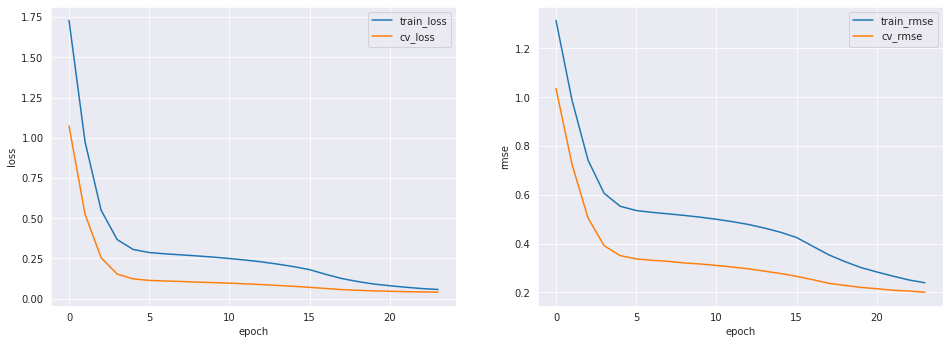

In [ ]:
# 5. Analysing model's performance on group data using train-cv (loss and rmse) plots
plt.figure(figsize = (16, 5.5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'][1:], label = 'train_loss')
plt.plot(hist.history['val_loss'][1:], label = 'cv_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['root_mean_squared_error'][1:], label = 'train_rmse')
plt.plot(hist.history['val_root_mean_squared_error'][1:], label = 'cv_rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend()
plt.show()

In [ ]:
# 6. find best model - based on (metric we care about) best val_rmse 
print('epoch :', np.argmin(hist.history['val_loss']), ' | ',\
      'val_loss :', hist.history['val_loss'][np.argmin(hist.history['val_loss'])])

epoch : 24  |  val_loss : 0.04020466282963753


In [ ]:
# 7. load best model
cpu_model.load_weights('/content/grp_cpu_models/weights-25-0.20.hdf5')

In [ ]:
# 8. Predictions
idx = 104
x_test = [grp_dense_x_cv[idx].reshape(1, -1), np.expand_dims(grp_lstm_x_cv[:, :, 1], axis = -1)[idx].reshape(1, 15, 1)]
y_pred = cpu_model.predict(x_test)
y_true = grp_y_cv[idx][1] 
print('predicted :', y_pred, ' | y_true :', y_true)


predicted : [[0.01807757]]  | y_true : 0.06


In [ ]:
tensorflow.keras.utils.plot_model(cpu_model, show_shapes = True)

### 7.2. Model for Memory_Used

In [ ]:
# 1. building a model - CPU_Used
tf.keras.backend.clear_session()

dense_ins = Input(name = 'constants', shape = (44,))

lstm_ins = Input(name = 'Sequence', shape = ((15, 1)))
lstm_out = LSTM(name = 'LSTM', units = 128, kernel_initializer = 'glorot_normal')(lstm_ins)

concat = Concatenate(axis = -1)([dense_ins, lstm_out])

dense_1 = Dense(units = 64, activation = 'relu')(concat)
dense_2 = Dense(units = 24, activation = 'relu')(dense_1)
out = Dense(units = 1)(dense_2)
memory_model = Model(inputs = [dense_ins, lstm_ins], outputs = out)
memory_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence (InputLayer)           [(None, 15, 1)]      0                                            
__________________________________________________________________________________________________
constants (InputLayer)          [(None, 44)]         0                                            
__________________________________________________________________________________________________
LSTM (LSTM)                     (None, 128)          66560       Sequence[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 172)          0           constants[0][0]                  
                                                                 LSTM[0][0]                   

In [ ]:
# 3. tensorflow-keras callbacks
# 3.1 To save best models
!rm -r mem_grp_models
if not os.path.isdir('/content/mem_grp_models'):
  os.mkdir('/content/mem_grp_models')
save_model = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/mem_grp_models/weights-{epoch:02d}-{val_loss:.2f}.hdf5',
                                                monitor='val_loss', verbose=1,
                                                save_best_only=True, save_weights_only=True)

# 3.2 Reduce learning rate if model is not learning
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = np.sqrt(0.1), patience = 4, verbose = 1, min_lr = 10**-6)

In [ ]:
# use RMSE for smaller values
# use MAE for larger values or mean_squared_logarithmic_error
# huber_loss - worked best

In [ ]:
# 4. training and evaluating model on cross validation
rmse = tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

memory_model.compile(loss = 'huber_loss', optimizer = opt, metrics = ['mean_absolute_error', rmse])
hist = memory_model.fit([grp_dense_x_train, np.expand_dims(grp_lstm_x_train[:, :, 0], axis = -1)], grp_y_train[:, 0], batch_size = 512, epochs = 30,
                 validation_data = ([grp_dense_x_cv, np.expand_dims(grp_lstm_x_cv[:, :, 0], axis = -1)], grp_y_cv[:, 0]),
                 callbacks = [save_model, reduce_lr]) 

Epoch 1/30
867/867 [==============================] - 7s 6ms/step - loss: 10340.9674 - mean_absolute_error: 10341.3262 - root_mean_squared_error: 20636.2444 - val_loss: 12325.7383 - val_mean_absolute_error: 12326.0752 - val_root_mean_squared_error: 23626.9434

Epoch 00001: val_loss improved from inf to 12325.73828, saving model to /content/mem_grp_models/weights-01-12325.74.hdf5
Epoch 2/30
867/867 [==============================] - 5s 6ms/step - loss: 10002.1756 - mean_absolute_error: 10002.5347 - root_mean_squared_error: 20363.1348 - val_loss: 10307.3408 - val_mean_absolute_error: 10307.6582 - val_root_mean_squared_error: 21905.6445

Epoch 00002: val_loss improved from 12325.73828 to 10307.34082, saving model to /content/mem_grp_models/weights-02-10307.34.hdf5
Epoch 3/30
867/867 [==============================] - 5s 6ms/step - loss: 8363.2062 - mean_absolute_error: 8363.5704 - root_mean_squared_error: 18651.2674 - val_loss: 8976.3574 - val_mean_absolute_error: 8976.7168 - val_root_mea

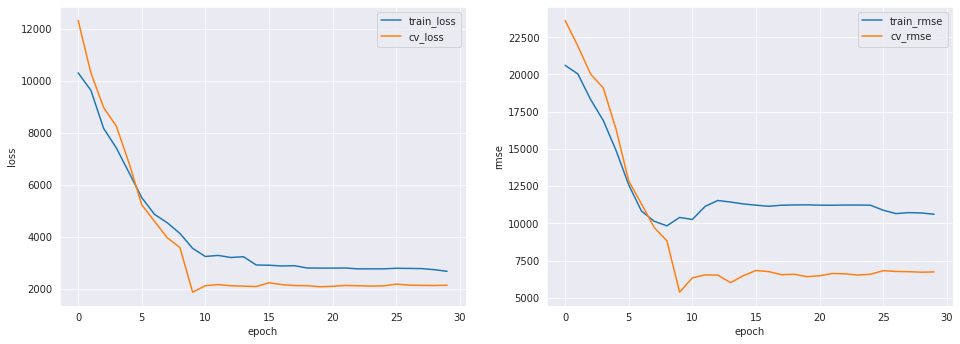

In [ ]:
# 5. Analysing model's performance on group data using train-cv (loss and rmse) plots
plt.figure(figsize = (16, 5.5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label = 'cv_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['root_mean_squared_error'], label = 'train_rmse')
plt.plot(hist.history['val_root_mean_squared_error'], label = 'cv_rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend()
plt.show()

In [ ]:
# 6. find best model - based on (metric we care about) best val_rmse 
print('epoch :', np.argmin(hist.history['val_loss']), ' | ',\
      'val_loss :', hist.history['val_loss'][np.argmin(hist.history['val_loss'])])

epoch : 9  |  val_loss : 1860.9815673828125


In [ ]:
# 7. load best model
memory_model.load_weights('/content/mem_grp_models/weights-10-1860.98.hdf5')

In [ ]:
# 8. Predictions
idx = 145
x_test = [grp_dense_x_cv[idx].reshape(1, -1), np.expand_dims(\
          grp_lstm_x_cv[:, :, 0], axis = -1)[idx].reshape(1, 15, 1)]
y_pred = memory_model.predict(x_test)
y_true = grp_y_cv[idx][0] 
print('predicted :', y_pred, ' | y_true :', y_true)

predicted : [[14626.854]]  | y_true : 16382.0


In [ ]:
tensorflow.keras.utils.plot_model(memory_model, show_shapes = True)

# 8. Final results - 

|  Models | train_rmse  | val_rmse  |train_mse |val_mse |train_mae|val_mae|
|---------|-------------|-----------|----------|--------|---------|-------|
| Instance_based_model  |131.7863   |99.2126   |-   | -  | -  |-   |
| Group_based_model (CPU) |0.243   | 0.2005  |0.059   |0.0402   | 0.1125  |0.0939   |
|Group_based_model (mem)   | -  | -  | -  | -  |3699.032   |1861.3419   |